In [6]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def generate_random_data():
    # create a random input, kernel and output
    x1 = np.random.randn(1)[0].astype(np.float32)
    x2 = np.random.randn(1)[0].astype(np.float32)
    x3 = np.random.randn(1)[0].astype(np.float32)
    x4 = np.random.randn(1)[0].astype(np.float32)
    k1 = np.random.randn(1)[0].astype(np.float32)
    k2 = np.random.randn(1)[0].astype(np.float32)
    k3 = np.random.randn(1)[0].astype(np.float32)
    k4 = np.random.randn(1)[0].astype(np.float32)
    y1 = np.random.randn(1)[0].astype(np.float32)
    return (x1, x2, x3, x4), (k1, k2, k3, k4), y1

In [15]:
# some constants
TRAIN_ITERS = 500
LEARNING_RATE = 0.001
e = 2.71828

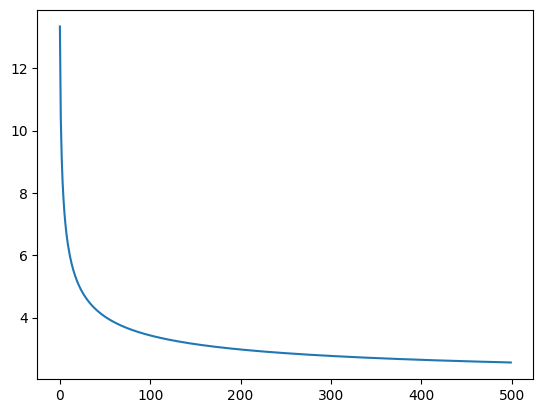

In [27]:
(x1, x2, x3, x4), (k1, k2, k3, k4), y1 = generate_random_data()

# train the parameters k1, k2, k3, k4 which make up a (2, 2) convolutional kernel
losses = []
for _ in range(TRAIN_ITERS):
    # forward
    z1 = (x1*k1 + x2*k2 + x3*k3 + x4*k4) / 4
    o1 = 1 / (1 - e**z1)
    
    loss = (o1 - y1)**2
    losses.append(loss)
    
    # backward
    dLoss = 2*(o1 - y1)
    do1 = o1*(1 - o1)
    
    dk1 = dLoss * do1 * x1
    dk2 = dLoss * do1 * x2
    dk3 = dLoss * do1 * x3
    dk4 = dLoss * do1 * x4
    
    k1 += LEARNING_RATE * dk1
    k2 += LEARNING_RATE * dk2
    k3 += LEARNING_RATE * dk3
    k4 += LEARNING_RATE * dk4
    
plt.plot(losses)